In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
data=pd.read_csv("2_5238068541411838940.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Yes No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No No
4,9237-HQITU,NaN,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes Yes


# Data Preprocessing

In [4]:
data.shape

(7043, 22)

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PhoneService,PaperlessBilling'],
      dtype='object')

#Changing Data Columns

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7043 non-null   object 
 1   gender                         6943 non-null   object 
 2   SeniorCitizen                  7043 non-null   int64  
 3   Partner                        6943 non-null   object 
 4   Dependents                     7043 non-null   object 
 5   tenure                         7043 non-null   int64  
 6   PhoneService                   7043 non-null   object 
 7   MultipleLines                  7043 non-null   object 
 8   InternetService                7043 non-null   object 
 9   OnlineSecurity                 7043 non-null   object 
 10  OnlineBackup                   7043 non-null   object 
 11  DeviceProtection               7043 non-null   object 
 12  TechSupport                    7043 non-null   o

In [223]:
data['TotalCharges'] = data['TotalCharges'].str.strip()
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [224]:
data['TotalCharges'].isnull().sum()

11

In [225]:
data.dropna(subset=["TotalCharges"],inplace=True)

In [226]:
data['TotalCharges'].isnull().sum()

0

In [227]:
data['TotalCharges'].isnull().sum()

0

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customerID                     7032 non-null   object 
 1   gender                         6932 non-null   object 
 2   SeniorCitizen                  7032 non-null   int64  
 3   Partner                        6933 non-null   object 
 4   Dependents                     7032 non-null   object 
 5   tenure                         7032 non-null   int64  
 6   PhoneService                   7032 non-null   object 
 7   MultipleLines                  7032 non-null   object 
 8   InternetService                7032 non-null   object 
 9   OnlineSecurity                 7032 non-null   object 
 10  OnlineBackup                   7032 non-null   object 
 11  DeviceProtection               7032 non-null   object 
 12  TechSupport                    7032 non-null   object

# Imputation of Nulls

In [229]:
data.isnull().sum()

customerID                         0
gender                           100
SeniorCitizen                      0
Partner                           99
Dependents                         0
tenure                             0
PhoneService                       0
MultipleLines                      0
InternetService                    0
OnlineSecurity                     0
OnlineBackup                       0
DeviceProtection                   0
TechSupport                        0
StreamingTV                        0
StreamingMovies                    0
Contract                           0
PaperlessBilling                   0
PaymentMethod                      0
MonthlyCharges                     0
TotalCharges                       0
Churn                              0
PhoneService,PaperlessBilling      0
dtype: int64

In [230]:
data['Churn'].value_counts(normalize=True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [231]:
data['gender'].mode()

0    Male
Name: gender, dtype: object

In [232]:
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [233]:
data['Partner'].mode()

0    No
Name: Partner, dtype: object

In [234]:
data['Partner'].fillna(data['Partner'].mode()[0],inplace=True)

In [235]:
data.isnull().sum()

customerID                       0
gender                           0
SeniorCitizen                    0
Partner                          0
Dependents                       0
tenure                           0
PhoneService                     0
MultipleLines                    0
InternetService                  0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtection                 0
TechSupport                      0
StreamingTV                      0
StreamingMovies                  0
Contract                         0
PaperlessBilling                 0
PaymentMethod                    0
MonthlyCharges                   0
TotalCharges                     0
Churn                            0
PhoneService,PaperlessBilling    0
dtype: int64

# Outliers

In [236]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [237]:
data['SeniorCitizen'].value_counts()  # this is categorical variable

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

<Axes: ylabel='tenure'>

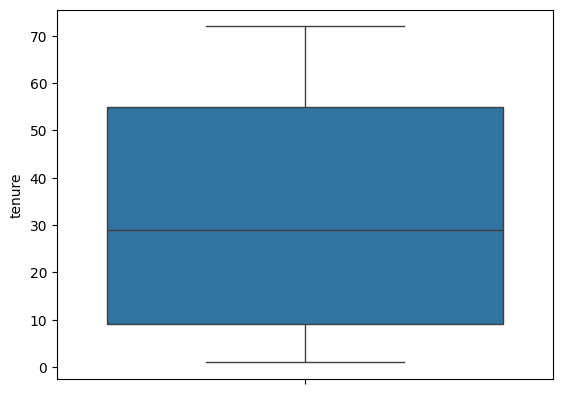

In [238]:
sns.boxplot(data['tenure'])

<Axes: ylabel='MonthlyCharges'>

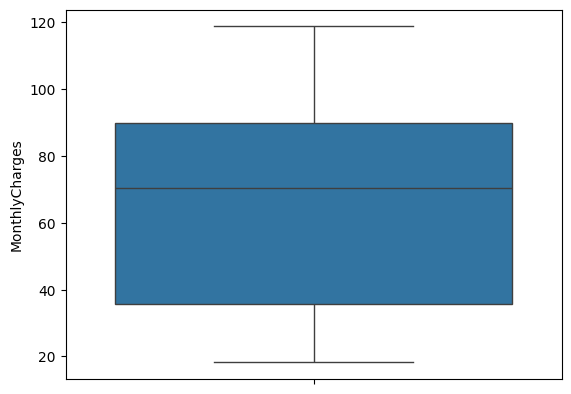

In [37]:
sns.boxplot(data['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

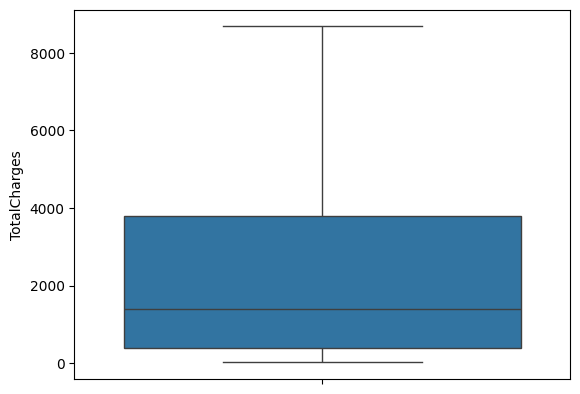

In [38]:
sns.boxplot(data['TotalCharges'])

In [205]:
def find_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [206]:
find_outliers('tenure')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


In [207]:
find_outliers('MonthlyCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


In [144]:
find_outliers('TotalCharges')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,"PhoneService,PaperlessBilling"


# Dropping Columns

In [239]:
data.drop(columns=['PhoneService,PaperlessBilling'],inplace=True)

In [240]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# One-Hot Encoding

In [243]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [244]:
columns_to_encode=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for i in columns_to_encode:
    print(f"{i}:",data[i].value_counts().index)
    print()

Partner: Index(['No', 'Yes'], dtype='object', name='Partner')

Dependents: Index(['No', 'Yes'], dtype='object', name='Dependents')

PhoneService: Index(['Yes', 'No'], dtype='object', name='PhoneService')

MultipleLines: Index(['No', 'Yes', 'No phone service'], dtype='object', name='MultipleLines')

InternetService: Index(['Fiber optic', 'DSL', 'No'], dtype='object', name='InternetService')

OnlineSecurity: Index(['No', 'Yes', 'No internet service'], dtype='object', name='OnlineSecurity')

OnlineBackup: Index(['No', 'Yes', 'No internet service'], dtype='object', name='OnlineBackup')

DeviceProtection: Index(['No', 'Yes', 'No internet service'], dtype='object', name='DeviceProtection')

TechSupport: Index(['No', 'Yes', 'No internet service'], dtype='object', name='TechSupport')

StreamingTV: Index(['No', 'Yes', 'No internet service'], dtype='object', name='StreamingTV')

StreamingMovies: Index(['No', 'Yes', 'No internet service'], dtype='object', name='StreamingMovies')

Contract: Index(

In [245]:
data = pd.get_dummies(data, columns=columns_to_encode,drop_first=True,dtype='int')

In [246]:
data.head()

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,Female,0,1,29.85,29.85,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,34,56.95,1889.50,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,2,53.85,108.15,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,Male,0,45,42.30,1840.75,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,Male,0,2,70.70,151.65,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


# Feature Scaling

In [247]:
data[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])

In [249]:
data.head()

,customerID,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,Female,0,0.000000,0.115423,0.001275,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,Male,0,0.464789,0.385075,0.215867,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,Male,0,0.014085,0.354229,0.010310,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,Male,0,0.619718,0.239303,0.210241,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,Male,0,0.014085,0.521891,0.015330,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [250]:
data[['tenure','MonthlyCharges','TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,0.442560,0.345708,0.0,0.112676,0.394366,0.760563,1.0
MonthlyCharges,7032.0,0.463166,0.299363,0.0,0.172512,0.518408,0.712562,1.0
TotalCharges,7032.0,0.261309,0.261571,0.0,0.044155,0.159090,0.435719,1.0


# Building Model

In [251]:
from sklearn.preprocessing import LabelEncoder

label_encoder_customerID = LabelEncoder()
label_encoder_gender = LabelEncoder()


# Fit and transform on training set
data["customerID_encoder"] = label_encoder_gender.fit_transform(data['customerID'])
data["gender_encoder"] = label_encoder_customerID.fit_transform(data["gender"])


# Drop original columns from both train and test sets
data.drop(columns=["customerID","gender"], inplace=True)




In [252]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID_encoder,gender_encoder
0,0,0.000000,0.115423,0.001275,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,5365,0
1,0,0.464789,0.385075,0.215867,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,3953,1
2,0,0.014085,0.354229,0.010310,0,0,1,0,0,0,...,0,0,0,1,0,0,1,1,2558,1
3,0,0.619718,0.239303,0.210241,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,5524,1
4,0,0.014085,0.521891,0.015330,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,6500,1


In [254]:
corr_matrix=data.corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,customerID_encoder,gender_encoder
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.013199,-0.210550,0.008392,-0.008392,0.142996,0.254923,...,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987,0.150541,-0.002368,-0.000745
tenure,0.015683,1.000000,0.246862,0.825880,0.377756,0.163386,0.007877,-0.007877,0.332399,0.017930,...,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181,-0.354049,0.007209,0.007415
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.094235,-0.112343,0.248033,-0.248033,0.490912,0.787195,...,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568,0.192858,-0.004445,-0.013177
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.314553,0.064653,0.113008,-0.113008,0.469042,0.360769,...,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708,-0.199484,-0.000263,0.002269
Partner_Yes,0.013199,0.377756,0.094235,0.314553,1.000000,0.446270,0.017604,-0.017604,0.139819,-0.001051,...,0.117255,0.084843,0.246135,-0.011858,0.082940,-0.084573,-0.096053,-0.151819,-0.027565,-0.001358
Dependents_Yes,-0.210550,0.163386,-0.112343,0.064653,0.446270,1.000000,-0.001078,0.001078,-0.024307,-0.164101,...,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448,-0.163128,-0.011871,0.012329
PhoneService_Yes,0.008392,0.007877,0.248033,0.113008,0.017604,-0.001078,1.000000,-1.000000,0.279530,0.290183,...,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463,0.011691,-0.006987,-0.007396
MultipleLines_No phone service,-0.008392,-0.007877,-0.248033,-0.113008,-0.017604,0.001078,-1.000000,1.000000,-0.279530,-0.290183,...,0.033477,0.003142,-0.004442,-0.016696,0.006916,-0.002747,0.004463,-0.011691,0.006987,0.007396
MultipleLines_Yes,0.142996,0.332399,0.490912,0.469042,0.139819,-0.024307,0.279530,-0.279530,1.000000,0.366420,...,0.259194,-0.003594,0.106618,0.163746,0.060319,0.083583,-0.227672,0.040033,0.002228,-0.007942
InternetService_Fiber optic,0.254923,0.017930,0.787195,0.360769,-0.001051,-0.164101,0.290183,-0.290183,0.366420,1.000000,...,0.322457,-0.076809,-0.209965,0.326470,-0.050552,0.335763,-0.305984,0.307463,-0.008899,-0.011384


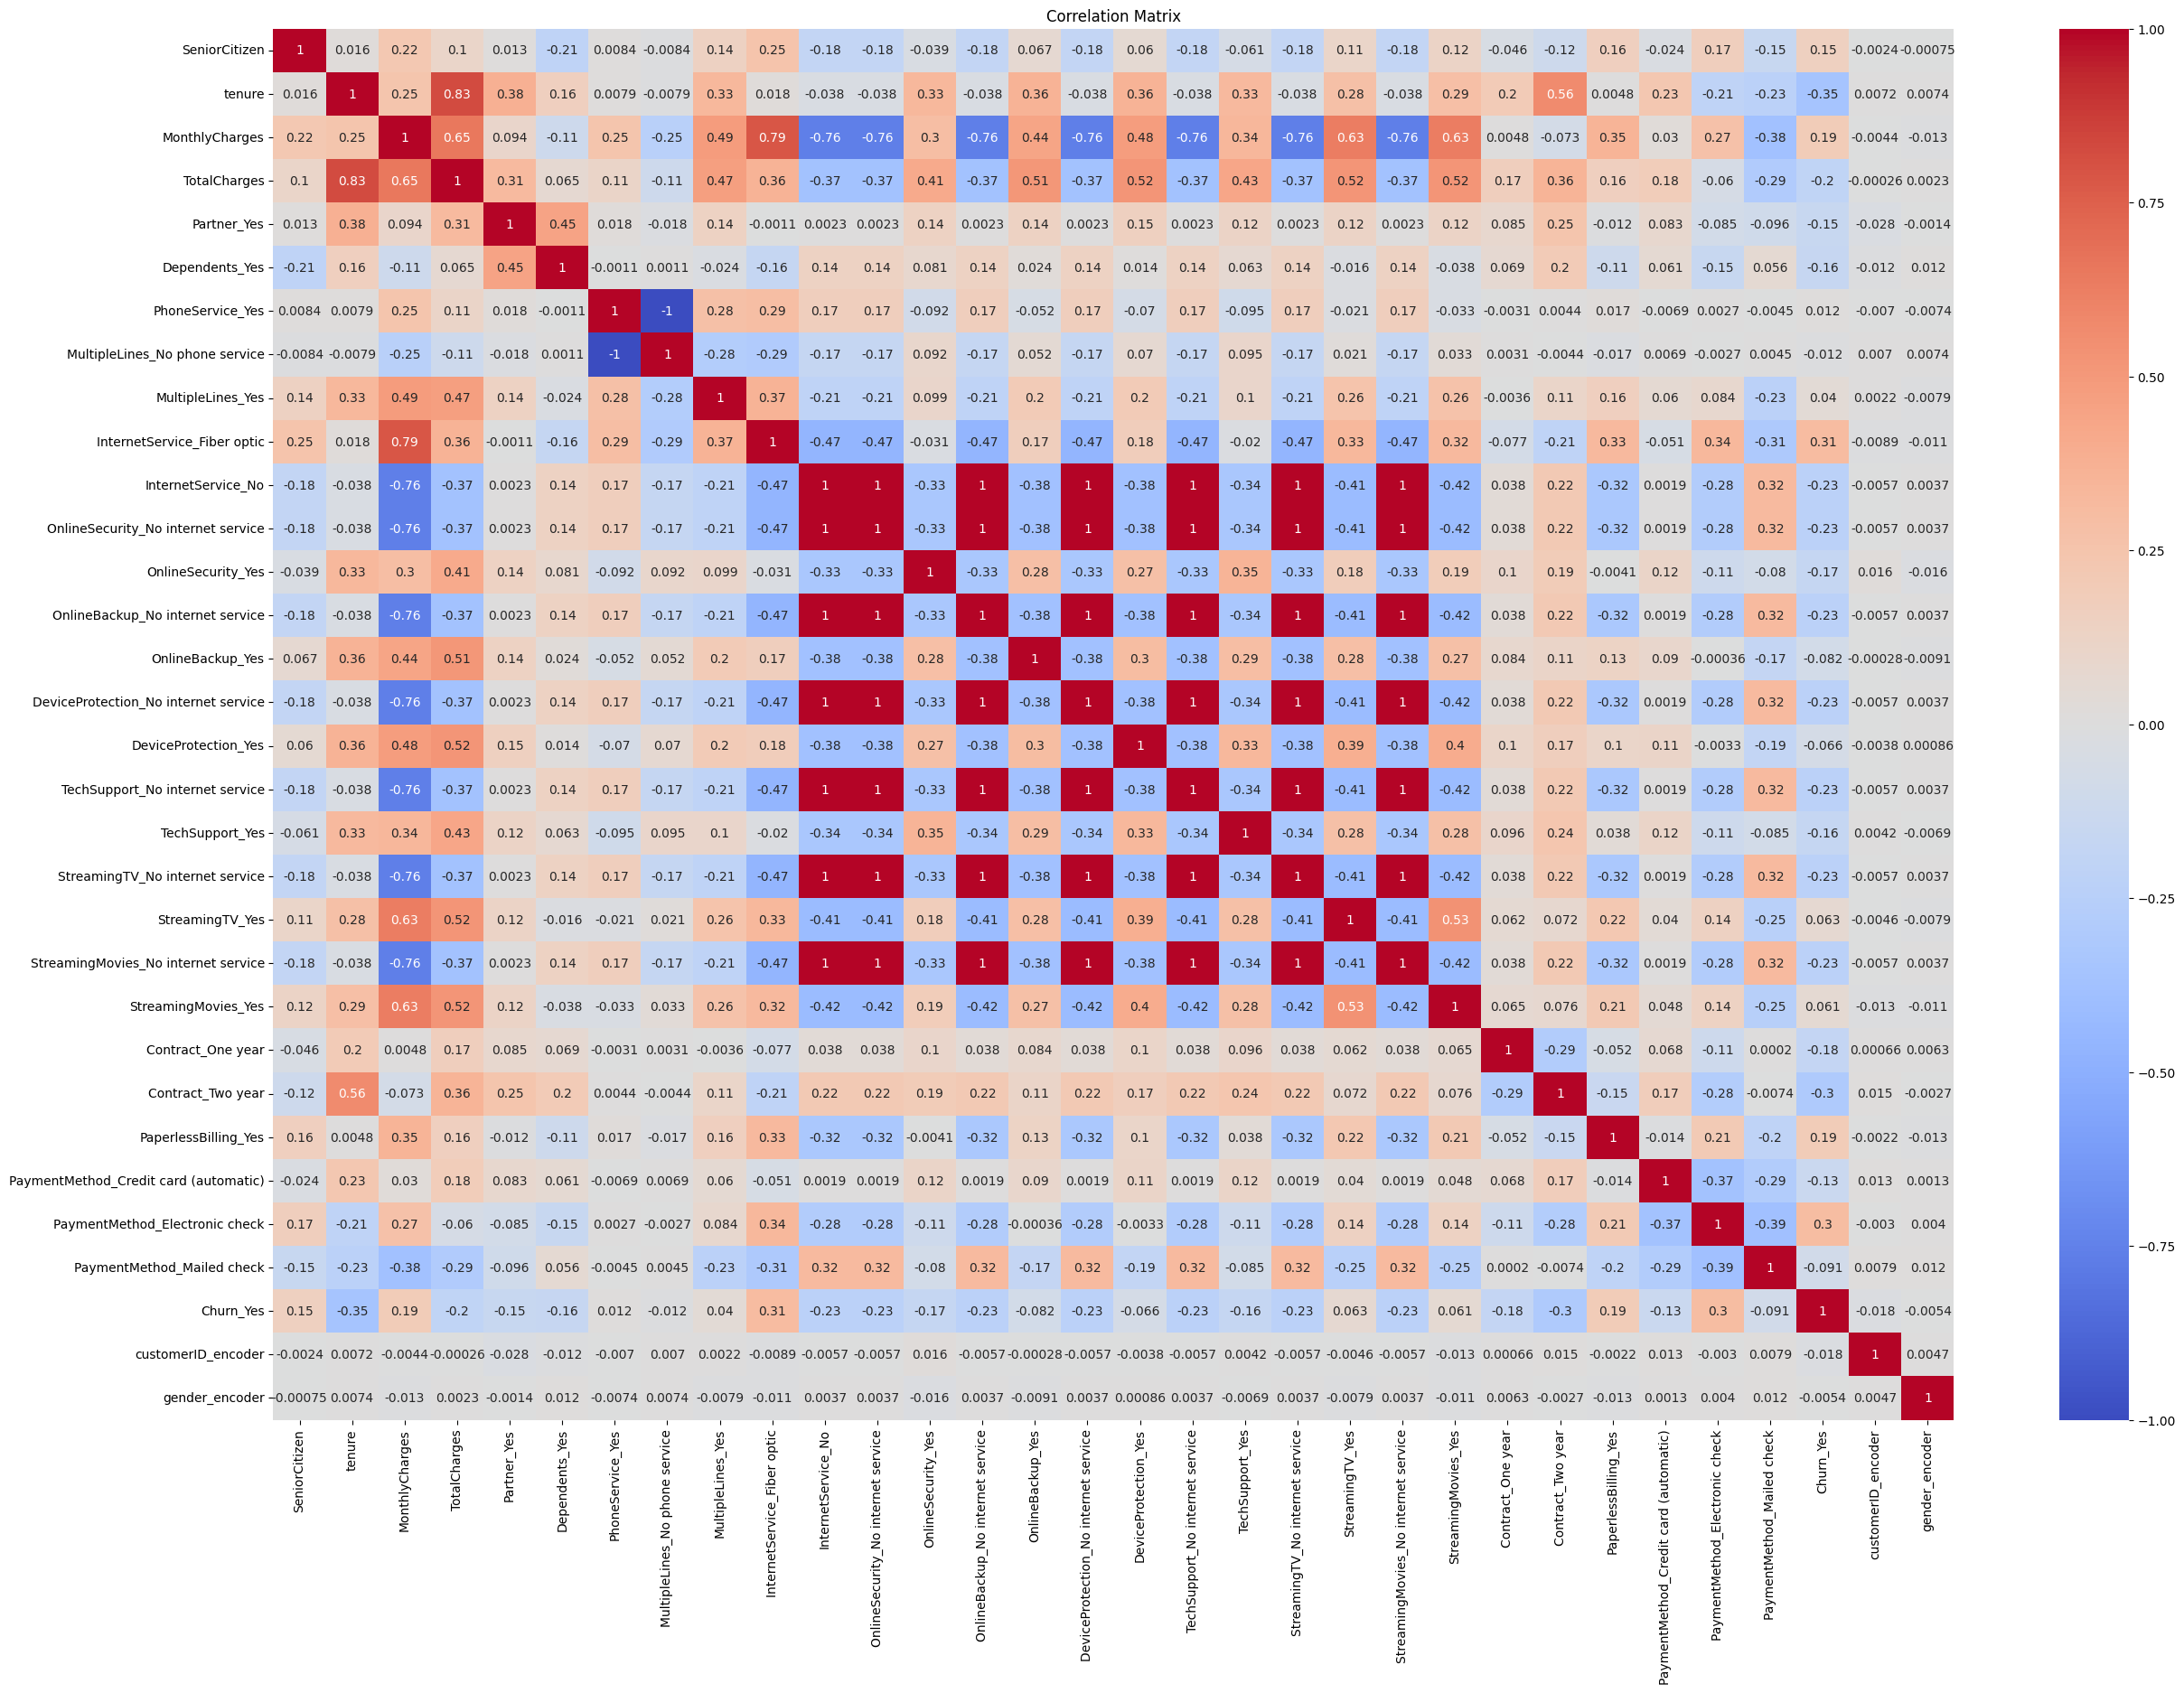

In [256]:
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [316]:
from sklearn.model_selection import train_test_split
X=data.drop(["Churn_Yes"],axis=1)
y=data["Churn_Yes"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [287]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID_encoder,gender_encoder
0,0,0.000000,0.115423,0.001275,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,5365,0
1,0,0.464789,0.385075,0.215867,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,3953,1
2,0,0.014085,0.354229,0.010310,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,2558,1
3,0,0.619718,0.239303,0.210241,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,5524,1
4,0,0.014085,0.521891,0.015330,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,6500,1


In [288]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Yes, dtype: int64

In [260]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID_encoder,gender_encoder
6030,0,0.591549,0.306468,0.237411,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1365,0
3410,0,0.028169,0.349751,0.019605,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,3462,1
5483,0,0.760563,0.592040,0.512272,1,0,1,0,1,1,...,0,0,0,0,1,0,1,0,3923,0
5524,0,0.619718,0.362189,0.292511,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1165,1
6337,0,0.760563,0.822388,0.626564,1,1,1,0,1,1,...,0,1,1,0,0,0,0,1,1857,0


# Logistic Regression

In [317]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [318]:
models={"Logistic Regression":LogisticRegression(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(42)
  model_scores={}
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_test, y_test)#evaluation accurcy for  each model test data(accuracy_score(y_test,y_pred))
  return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7860696517412935,
 'Random Forest': 0.7981520966595593}

In [ ]:
#Precision=measures the accuracy of positive predictions
#Recall=measures the proportion of actual positives that were correctly predicted.
#F1-score=F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall
#Support=Support is the number of actual occurrences of each class in y_test.

In [319]:
from sklearn.metrics import classification_report #This function is used to generate a detailed report evaluating the performance of a classification model.

# For Random Forest
y_pred_rf = models["Random Forest"].predict(X_test) #predict target labels
report_rf = classification_report(y_test, y_pred_rf) #computes  classification metrics
print("Classification Report (Random Forest):\n", report_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [314]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

[[945  88]
 [196 178]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

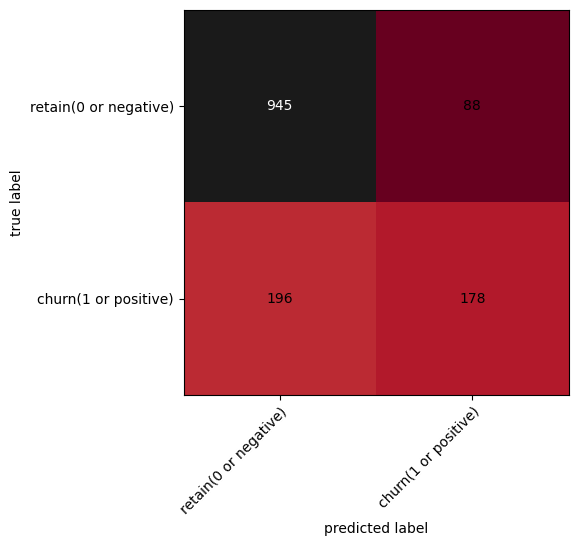

In [320]:
conf_matrix=confusion_matrix(y_test,y_pred_rf)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

In [321]:
y_pred_lr=models["Logistic Regression"].predict(X_test)
report_lr=classification_report(y_test,y_pred_rf)
print("Classification Report (Logistic Regression):\n", report_lr)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.67      0.48      0.56       374

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



[[910 123]
 [178 196]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

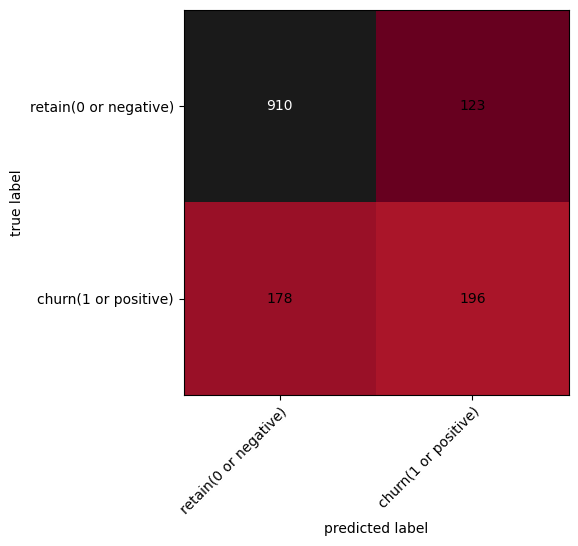

In [322]:
conf_matrix=confusion_matrix(y_test,y_pred_lr)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["retain(0 or negative)","churn(1 or positive)"],figsize=(12,5),cmap= plt.cm.RdGy)

In [300]:
model = {"KNN": KNeighborsClassifier()}

knn_model_scores = fit_and_score(models=model,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
knn_model_scores


{'KNN': 0.6808813077469794}

In [323]:
train_scores = [] #to store the accuracy scores of the KNN model
test_scores = []

neighbors = range(1, 21) #in here we check n_neighbor for every number

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [324]:
max_test_score_knn= max(test_scores) #Finds the maximum accuracy score achieved on the test set (X_test and y_test).
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score_knn] #Identifies the indices where the test accuracy equals max_test_score_knn.
print('Max test score {} % and k = {}'.format(max_test_score_knn*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.48969438521678 % and k = [20]


In [325]:
model = {"KNN": KNeighborsClassifier(n_neighbors=20)} #default n-neighbor=5

knn_model_scores = fit_and_score(models=model,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
knn_model_scores

{'KNN': 0.7348969438521677}